# A company is trying to understand how to improve the quality of 1:1 customer support. Use the explore support ticket data and develop suggestions for the business. For each ticket, customers are asked to rate their experience on a scale of 1 to 5 (1 is the worst; 3 is neutral; 5 is the best). This survey response is recorded in the SURVEY_SCORE column.

##PART 1: DATA SET EXPLORATION AND CLEANING

##I am importing these libraries, in advance, in case I need to use some of them to complete this exercise

In [244]:
#code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

##Loading the provided dataset saved in my local drive. I converted the CREATED_DAY, CLOSED_DAY, and CREATED_TIME to date_time and extracted only the dates and time respectively.

In [332]:
#code
df = pd.read_csv (r'C:\Users\dikae\OneDrive\Documents\ca_takehome_assessment.csv')
df.CREATED_DAY = pd.to_datetime(df.CREATED_DAY).dt.date
df.CLOSED_DAY = pd.to_datetime(df.CLOSED_DAY).dt.date
df.CREATED_TIME = pd.to_datetime(df.CREATED_TIME).dt.time
df.head(10)

,ticket_id,CREATED_DAY,CLOSED_DAY,CREATED_TIME,SUPPORT_CHANNEL,user_type,COUNTRY,ISSUE_TYPE_CATEGORY,TICKET_REPLIES,CALL_LENGTH_MIN,CHAT_DURATION_MIN,FULL_RESOLUTION_TIME,SURVEY_SCORE
0,1,1970-01-01,1970-01-01,00:21:48,phone,business,us,desktop app,NaN,7.766667,NaN,NaN,NaN
1,2,1970-01-01,1970-01-01,00:34:30,email,business,us,payments,1.0,NaN,NaN,93.466667,NaN
2,3,1970-01-01,1970-01-01,00:36:34,chat,business,jp,desktop app,1.0,NaN,12.716667,4.766667,5.0
3,4,1970-01-01,1970-01-01,00:18:24,chat,business,jp,admin console,2.0,NaN,31.116667,37.700000,4.0
4,5,1970-01-01,1970-01-01,00:52:45,email,business,au,sharing,1.0,NaN,NaN,54.050000,NaN
5,6,1970-01-01,1970-01-01,00:04:15,chat,business,no,desktop app,0.0,NaN,16.116667,8.033333,NaN
6,7,1970-01-01,1970-01-01,00:55:16,chat,business,es,payments,1.0,NaN,21.250000,0.283333,5.0
7,8,1970-01-01,1970-01-01,00:06:43,email,business,cr,sharing,2.0,NaN,NaN,33.916667,NaN
8,9,1970-01-01,1970-01-01,00:22:12,chat,business,jp,restorations,1.0,NaN,8.166667,1.916667,5.0
9,10,1970-01-01,1970-01-01,00:50:15,chat,business,se,admin console,1.0,NaN,8.166667,4.283333,5.0


##I am developing a new column TOTAL_MIN with a combination of chats, chatbots, emails and call lengths. This is to easen my analysis for the typical handle time down the line per support channel and comparing per user type. I replaced NaN values with 0 in order to avoid having NaN values in the new column - TOTAL_MIN. 

In [333]:
#code
df['TOTAL_MIN'] =  df['CHAT_DURATION_MIN'].fillna(0) + df['CALL_LENGTH_MIN'].fillna(0)
print('Updated DataFrame:')
df.head(10)

Updated DataFrame:


,ticket_id,CREATED_DAY,CLOSED_DAY,CREATED_TIME,SUPPORT_CHANNEL,user_type,COUNTRY,ISSUE_TYPE_CATEGORY,TICKET_REPLIES,CALL_LENGTH_MIN,CHAT_DURATION_MIN,FULL_RESOLUTION_TIME,SURVEY_SCORE,TOTAL_MIN
0,1,1970-01-01,1970-01-01,00:21:48,phone,business,us,desktop app,NaN,7.766667,NaN,NaN,NaN,7.766667
1,2,1970-01-01,1970-01-01,00:34:30,email,business,us,payments,1.0,NaN,NaN,93.466667,NaN,0.000000
2,3,1970-01-01,1970-01-01,00:36:34,chat,business,jp,desktop app,1.0,NaN,12.716667,4.766667,5.0,12.716667
3,4,1970-01-01,1970-01-01,00:18:24,chat,business,jp,admin console,2.0,NaN,31.116667,37.700000,4.0,31.116667
4,5,1970-01-01,1970-01-01,00:52:45,email,business,au,sharing,1.0,NaN,NaN,54.050000,NaN,0.000000
5,6,1970-01-01,1970-01-01,00:04:15,chat,business,no,desktop app,0.0,NaN,16.116667,8.033333,NaN,16.116667
6,7,1970-01-01,1970-01-01,00:55:16,chat,business,es,payments,1.0,NaN,21.250000,0.283333,5.0,21.250000
7,8,1970-01-01,1970-01-01,00:06:43,email,business,cr,sharing,2.0,NaN,NaN,33.916667,NaN,0.000000
8,9,1970-01-01,1970-01-01,00:22:12,chat,business,jp,restorations,1.0,NaN,8.166667,1.916667,5.0,8.166667
9,10,1970-01-01,1970-01-01,00:50:15,chat,business,se,admin console,1.0,NaN,8.166667,4.283333,5.0,8.166667


##Here is a quick feel of the data and possibly identifying some outliers. I used both df.describe() to see the statistics for the numerial values and 'included all' to see more non numeric data information. There are 28, 4, 5 types of issues, users and support channels respectively. Chat is the top support channel. Paid individual are the top users. Payments makes up top issues requiring support. This data set captures support ticktes records in one particular day (1970-01-01) within a short timeframe. There is a max 100000 TOTAL_MIN that could throw off the rest of statiscal numbers and paint false picture in analysis of handle time or something else. There is a -5 CALL_LENGTH_MIN that could be false because minutes cannot be negative. There are some records with missing values based on count that might be significant because of some of the questions to be answered. For example, user_type and survey_score.

In [335]:
#code
# df.describe()
df.describe(include = "all") 

,ticket_id,CREATED_DAY,CLOSED_DAY,CREATED_TIME,SUPPORT_CHANNEL,user_type,COUNTRY,ISSUE_TYPE_CATEGORY,TICKET_REPLIES,CALL_LENGTH_MIN,CHAT_DURATION_MIN,FULL_RESOLUTION_TIME,SURVEY_SCORE,TOTAL_MIN
count,50000.000000,50000,49969,50000,50000,49637,49503,50000,49450.000000,4478.000000,27390.000000,49247.000000,13613.000000,50000.000000
unique,NaN,1,1,3600,5,4,169,28,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1970-01-01,1970-01-01,00:42:05,chat,paid individual,us,payments,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50000,49969,28,28626,25153,21464,17677,NaN,NaN,NaN,NaN,NaN,NaN
mean,25000.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.381314,53.550547,20.169366,27.021825,4.548299,15.844766
std,14433.901067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.247359,1823.655666,17.400116,71.212928,1.083140,546.063603
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-5.000000,0.000000,0.000000,1.000000,-5.000000
25%,12500.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.383333,9.066667,0.550000,5.000000,0.000000
50%,25000.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,10.858334,15.600000,3.250000,5.000000,7.616667
75%,37500.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,19.529166,25.783333,26.733333,5.000000,18.433333


##I am taking a close look at the unique support channels and user types values to know them and also identify any anomalities since I will be using them to answer questions for this exercise

In [253]:
#code
df['SUPPORT_CHANNEL'].value_counts()

chat        28626
email       15517
phone        4575
email ar      858
chatbot       424
Name: SUPPORT_CHANNEL, dtype: int64

In [254]:
df['user_type'].value_counts()

paid individual    25153
business           19822
hs: free            2589
hs: paid            2073
Name: user_type, dtype: int64

Looks like 'email ar' is a typo. I am removing 'ar' to just remain with 'email' and eliminate the abnormal channel type. Creating a new dataframe df1 with the updated number of support channel types. User types seems to be good.

In [336]:
df1 = df.replace(to_replace ='email ar', value = 'email', regex = True)
  
# Print the updated dataframe
df1['SUPPORT_CHANNEL'].value_counts()

chat       28626
email      16375
phone       4575
chatbot      424
Name: SUPPORT_CHANNEL, dtype: int64

##I am converting all CALL_LENGTH_MIN and TOTAL_MIN positive to eliminate the negative values in the column because it's not logical for have negative minutes when interacting 

In [262]:
#code
df1['TOTAL_MIN'] = df1['TOTAL_MIN'].abs()
df1['CALL_LENGTH_MIN'] = df1['CALL_LENGTH_MIN'].abs()
df1.describe()

,ticket_id,TICKET_REPLIES,CALL_LENGTH_MIN,CHAT_DURATION_MIN,FULL_RESOLUTION_TIME,SURVEY_SCORE,TOTAL_MIN
count,50000.000000,49450.000000,4478.000000,27390.000000,49247.000000,13613.000000,50000.000000
mean,25000.500000,1.381314,53.554120,20.169366,27.021825,4.548299,15.845086
std,14433.901067,1.247359,1823.655561,17.400116,71.212928,1.083140,546.063593
min,1.000000,0.000000,0.033333,0.000000,0.000000,1.000000,0.000000
25%,12500.750000,1.000000,6.383333,9.066667,0.550000,5.000000,0.000000
50%,25000.500000,1.000000,10.858334,15.600000,3.250000,5.000000,7.616667
75%,37500.250000,1.000000,19.529166,25.783333,26.733333,5.000000,18.433333
max,50000.000000,32.000000,100000.000000,223.400000,1587.400000,5.000000,100000.000000


##I displayed some outlier values total minutes using a box plot. Also, identified and removed the outliers using inter-quartile range in Seaborn. This is to reduce biasness, false picture, incorrect aggregated numbers in the analysis

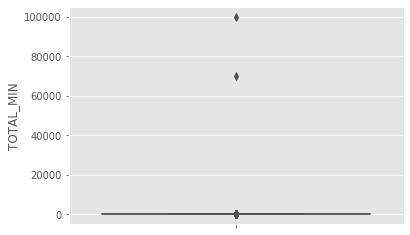

In [263]:
#code
sns.boxplot(y=df1['TOTAL_MIN'])

In [264]:
#code
Q1 = df1['TOTAL_MIN'].quantile(0.25)
Q3 = df1['TOTAL_MIN'].quantile(0.75)
IQR = Q3 - Q1     
filter = (df1['TOTAL_MIN'] >= Q1 - 1.5 * IQR) & (df1['TOTAL_MIN'] <= Q3 + 1.5 *IQR)
df2 = df1.loc[filter]
df2.describe()

,ticket_id,TICKET_REPLIES,CALL_LENGTH_MIN,CHAT_DURATION_MIN,FULL_RESOLUTION_TIME,SURVEY_SCORE,TOTAL_MIN
count,47807.000000,47284.000000,4276.000000,25398.000000,47090.000000,12628.000000,47807.000000
mean,25039.961554,1.369533,13.269637,16.567503,26.947972,4.563906,9.988546
std,14429.662462,1.229636,9.569383,10.451674,71.696277,1.071212,11.315358
min,1.000000,0.000000,0.033333,0.000000,0.000000,1.000000,0.000000
25%,12549.500000,1.000000,6.229166,8.583333,0.550000,5.000000,0.000000
50%,25053.000000,1.000000,10.333333,14.533333,3.266667,5.000000,6.733333
75%,37542.500000,1.000000,17.850000,22.795833,26.633333,5.000000,16.666667
max,50000.000000,32.000000,45.916667,46.066667,1587.400000,5.000000,46.066667


##I'm dropping 363 records with no user types to reduce biasness when comparing handle time per channel among user types. Also, creating new data frame, df3, without the missing user type values

In [290]:
#code
df3 = df2.dropna(subset=['user_type']) 
df3.isnull().sum()

ticket_id                   0
CREATED_DAY                 0
CLOSED_DAY                 30
CREATED_TIME                0
SUPPORT_CHANNEL             0
user_type                   0
COUNTRY                   494
ISSUE_TYPE_CATEGORY         0
TICKET_REPLIES            512
CALL_LENGTH_MIN         43211
CHAT_DURATION_MIN       22263
FULL_RESOLUTION_TIME      706
SURVEY_SCORE            34940
TOTAL_MIN                   0
dtype: int64

##PART 2 : ANSWERING THE QUESTIONS

##What are the typical handle times by support channel? 
ANS: Typical handle are shown below, in minutes, with the respective support channel
SUPPORT_CHANNEL
chat       15.72 
chatbot     1.92
email       0.14
phone      12.68

NOTE: There might not be sufficient values to determine the handle time for email as a support channel. The average handle time displayed for emails is not close to accurate.

In [291]:
#code
aht_df = df3.groupby(by=['SUPPORT_CHANNEL'])['TOTAL_MIN'].mean()
print(aht_df)

SUPPORT_CHANNEL
chat       15.724601
chatbot     1.920340
email       0.136933
phone      12.678800
Name: TOTAL_MIN, dtype: float64


##I visualized the typical handle time per support channel as shown below to better see how the channels compare to each other. Chats take more handle time. Followed by phone calls then chatbot. Like I mentioned earlier, emails handle time displayed below might not display a close to true picture because insufficecient data.

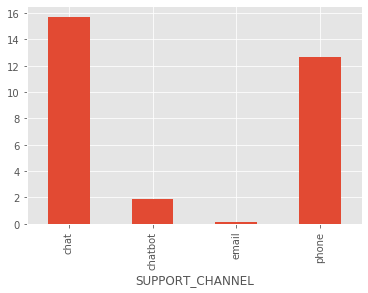

In [292]:
#code
aht_df.plot.bar()
plt.show()

##Are there differences between user types?
ANS: Yes there are diffrences in typical handle time among user types.

In [337]:
#code
aht_df2 = df3.groupby(by=['SUPPORT_CHANNEL','user_type'])['TOTAL_MIN'].mean()
print(aht_df2)

SUPPORT_CHANNEL  user_type      
chat             business           16.083852
                 paid individual    15.515151
chatbot          business            2.561667
                 paid individual     1.694231
email            business            0.437567
                 hs: free            0.000000
                 hs: paid            0.000000
                 paid individual     0.020824
phone            business           12.715272
                 paid individual     9.258333
Name: TOTAL_MIN, dtype: float64


##Are there differences between user types?
ANS CONTINUED: Agents tend to spend more time with the business users compared to other users regardless of the support channel being used followed by paid individual users. 'hs: free' and 'hs: paid' have no sufficient data to determin the handle time. These users majorly use emails as the support channel. Please refer to the graph below for visuals.

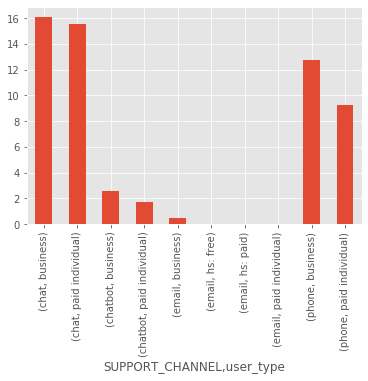

In [285]:
#code
aht_df2.plot.bar()
plt.show()

##What data issues are you concerned about, if any? Is there additional data you’d like to see/collect?
ANS: The following are some of the concerns when I was working with the data and additional recommended data that I would have liked to see:
- This data set captures support ticktes records in one particular day (1970-01-01) within a short timeframe. I would like to have records from different days for the week and timeframes to see an unbiased  picture of how the support center operates
- I would like to see hold time included in the data set. This would have made determining the typical hold time more acurate 
- Email support channel have very few records with chats/calls durations. The information was not sufficient to paint the true picture of the average handle time for emails. The time that the agents take to reply a customer's support request email could have been included


##What types of tickets tend to receive the best survey scores, or the worst? 
ANS: Integration and teams support tickets receives the best ticket (average of 5 scores). in development/sunset support tickets recievs the worst survey scores(avarage of 2.5 scores) according to the dataset as shown below by the horozontal bar chart and score_df data frame displaying the avarage scores per issue type category.

In [304]:
#I filtered the records with no survey scores because they way throwing off the overal scores per issue type categories.
#code
filtered_df = df3[df3['SURVEY_SCORE'].notnull()]

In [319]:
#code
score_df = filtered_df.groupby(by=['ISSUE_TYPE_CATEGORY']) ['SURVEY_SCORE'].mean().sort_values()
print (score_df)

ISSUE_TYPE_CATEGORY
in development/sunset            2.750000
business features and profile    3.400000
hellosign api                    3.500000
passwords app                    3.675000
service and support              3.736025
promotions                       4.066667
smart workspace                  4.078947
account security                 4.122892
add ons                          4.166667
vault                            4.333333
mobile app                       4.368421
app integrations                 4.380531
website                          4.412607
desktop app                      4.512779
sharing                          4.599124
restorations                     4.610803
payments                         4.668583
account settings and data        4.700617
admin console                    4.709001
teams                            5.000000
integrations                     5.000000
Name: SURVEY_SCORE, dtype: float64


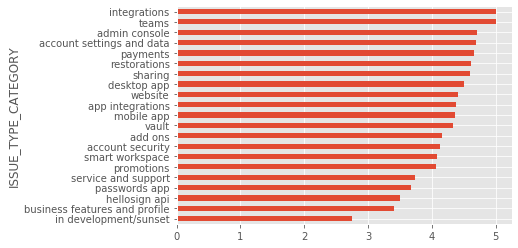

In [327]:
#code
score_df.plot.barh()
plt.show()


##What suggestions do you have to improve the quality of the support experience? 

ANS: One of my suggestions to improve the quality of the support experience is to uncover the the root causes of interactions that increases the length of agent's conversations, chats or email responses. This could be done by starting with 100% call/chats/email coverage to ensure that every interaction is monitered and identified. Capturing every hold time violations, excessive supervisor escalations, and any negative interactions that can be long. Supervisors can use all these information to better train agents on how to handle interactions that can negatively impact customer support experience. In addition, supervisors can identify and fix operational efficiency that may keep an agent from resolving customer's issue if the issue is out of their control.